In [25]:
# import libraries

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data_path = 'C:\\Users\\budha\\Desktop\\Learnings\\Tensorflow\\Coursera\\Module_1_Intro_Deep_Learning\\Week_3\\horse-or-human'

In [4]:
# check directory contents
os.listdir(data_path)

['train', 'validation']

In [7]:
# set up the train and validation data path

train_dir = os.path.join(data_path, 'train')
validation_dir = os.path.join(data_path, 'validation')

print(os.listdir(train_dir))
print(os.listdir(validation_dir))

['horses', 'humans']
['horses', 'humans']


In [13]:
# length of images

print('Number of horse images in training data : {}'.format(len(os.listdir(os.path.join(train_dir, 'horses')))))
print('Number of human images in training data : {}'.format(len(os.listdir(os.path.join(train_dir, 'humans')))))


Number of horse images in training data : 500
Number of human images in training data : 527


In [14]:
# length of images

print('Number of horse images in validation data : {}'.format(len(os.listdir(os.path.join(validation_dir, 'horses')))))
print('Number of human images in validation data : {}'.format(len(os.listdir(os.path.join(validation_dir, 'humans')))))

Number of horse images in validation data : 128
Number of human images in validation data : 128


## Create Model

In [8]:
import tensorflow as tf
import tensorflow.keras as keras

In [62]:
# function to create model

def create_model():
    
    model = keras.models.Sequential([
        
        keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300,3)),
        keras.layers.MaxPool2D(pool_size=(2,2)),
        
        keras.layers.Conv2D(32, (3,3), activation='relu'),
        keras.layers.MaxPool2D(pool_size=(2,2)),
        
        keras.layers.Conv2D(64, (3,3), activation='relu'),
        keras.layers.MaxPool2D(pool_size=(2,2)),
        
        keras.layers.Conv2D(64, (3,3), activation='relu'),
        keras.layers.MaxPool2D(pool_size=(2,2)),
        
        keras.layers.Flatten(),
        
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(1, activation ='sigmoid')
    ])
    
    # compile 
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    return model

## PreProcessing

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [63]:
# setting up data augmentation while importing the data on the fly

generator = ImageDataGenerator(rotation_range=40,
                               width_shift_range=0.2,
                               height_shift_range=0.2,
                               shear_range=0.2,
                               zoom_range=0.2,fill_mode='nearest',
                               horizontal_flip=True,
                               rescale=1.0/255.0)

In [64]:
# train generator

train_generator = generator.flow_from_directory(train_dir,
                                                target_size=(300,300),
                                                batch_size=128,
                                                class_mode='binary')

Found 1027 images belonging to 2 classes.


In [65]:
# validation generator

validation_generator = generator.flow_from_directory(validation_dir,
                                                target_size=(300,300),
                                                batch_size=32,
                                                class_mode='binary')

Found 256 images belonging to 2 classes.


In [66]:
## create model and fit

model = create_model()

In [67]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 149, 149, 16)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 35, 35, 64)      

In [68]:
# fit
model.fit(train_generator,
          epochs=15,
          validation_data=validation_generator)

Epoch 1/15
9/9 [==============================] - 58s 6s/step - loss: 0.7091 - accuracy: 0.5044 - val_loss: 0.6823 - val_accuracy: 0.6016
Epoch 2/15
9/9 [==============================] - 59s 6s/step - loss: 0.6507 - accuracy: 0.6105 - val_loss: 0.6954 - val_accuracy: 0.5430
Epoch 3/15
9/9 [==============================] - 65s 7s/step - loss: 0.6879 - accuracy: 0.6582 - val_loss: 1.3832 - val_accuracy: 0.5000
Epoch 4/15
9/9 [==============================] - 61s 7s/step - loss: 0.6043 - accuracy: 0.6738 - val_loss: 0.7775 - val_accuracy: 0.5430
Epoch 5/15
9/9 [==============================] - 62s 7s/step - loss: 0.5033 - accuracy: 0.7449 - val_loss: 1.1579 - val_accuracy: 0.5664
Epoch 6/15
9/9 [==============================] - 62s 8s/step - loss: 0.4986 - accuracy: 0.7459 - val_loss: 1.5256 - val_accuracy: 0.5234
Epoch 7/15
9/9 [==============================] - 61s 7s/step - loss: 0.4755 - accuracy: 0.7614 - val_loss: 1.3024 - val_accuracy: 0.5273
Epoch 8/15
9/9 [==================

In [60]:
# function to check and plot the accuracy

def loss_acc_plot(model):
    
    metrics = pd.DataFrame(model.history.history)

    fig, ax = plt.subplots(2, 1, figsize=(10,8))

    ax[0].plot(range(1, epoch + 1), metrics['val_loss'], label ='validation loss')
    ax[0].plot(range(1, epoch + 1), metrics['loss'], label ='training loss')

    ax[1].plot(range(1, epoch + 1), metrics['val_accuracy'], label ='validation accuracy')
    ax[1].plot(range(1, epoch + 1), metrics['accuracy'], label ='training accuracy')
    plt.legend(loc='best')
    fig.tight_layout()
    plt.show()


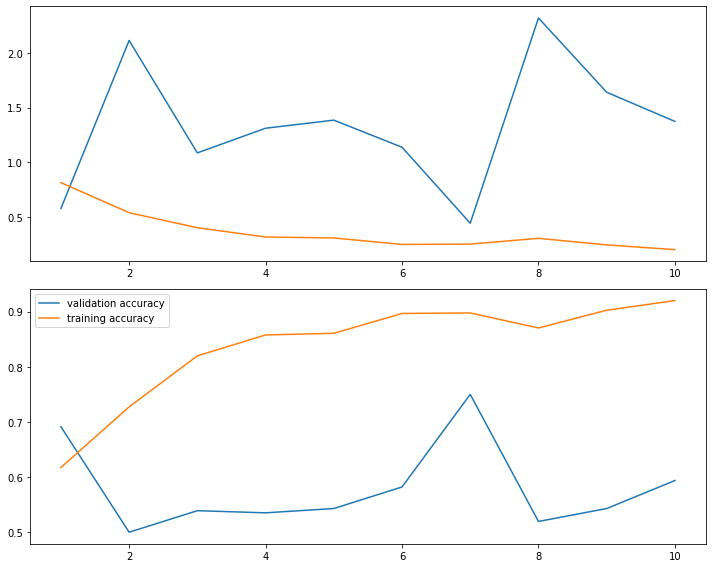

In [61]:
loss_acc_plot(model)